# CNN 심화

## [예제4] VGG-16 Fine Tuning

> ### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Import Keras Layers

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

> ### Load VGG16 Model

In [3]:
IMG_SIZE = 112

In [4]:
from tensorflow.keras.applications import VGG16

model = VGG16(
    weights="imagenet", 
    include_top=False, # 최상위 3개의 Dense layer 포함 여부 설정
    input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    )
 
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 112, 112, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 112, 112, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 112, 112, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 56, 56, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 56, 56, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 56, 56, 128)       147584    
______________________________________________________________

> ### Set trainable option

In [5]:
for layer in model.layers[:-4]:
    layer.trainable = False
 
for layer in model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fed75ed1550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed75ee1f98> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed75ede2e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed75ede748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed75ee2588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed75ee40f0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed75ee4908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed75f69cc0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed42235a58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fed42235b38> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fed300f0748> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

> ### Layer를 추가하여 모델 완성

In [6]:
model_fine = tf.keras.models.Sequential()
 
model_fine.add(model)
 
model_fine.add(Flatten())
model_fine.add(Dense(1024, activation='relu'))
model_fine.add(BatchNormalization())
model_fine.add(Dense(10, activation='softmax'))

model_fine.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 19,448,650
Trainable params: 11,811,338
Non-trainable params: 7,637,312
_________________________________________________________________


> ### Load CIFAR10 Data

In [7]:
from tensorflow.keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

train_data = train_data.astype(np.double)
train_data = train_data / 255.0

test_data = test_data.astype(np.double)
test_data = test_data / 255.0

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### Preprocessiing

In [8]:
train_data = tf.image.resize(train_data, (IMG_SIZE, IMG_SIZE))
test_data = tf.image.resize(test_data, (IMG_SIZE, IMG_SIZE))
print(train_data.shape, test_data.shape)

(50000, 112, 112, 3) (10000, 112, 112, 3)


> ### Compile Model

In [9]:
model_fine.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> ### Training

In [10]:
%%time
history = model_fine.fit(train_data, train_labels, shuffle=True,
                batch_size=500, epochs=20,
                validation_data=(test_data, test_labels))

Epoch 1/20
100/100 [==============================] - 33s 333ms/step - loss: 0.7657 - accuracy: 0.7402 - val_loss: 3.8811 - val_accuracy: 0.3985
Epoch 2/20
100/100 [==============================] - 33s 328ms/step - loss: 0.4610 - accuracy: 0.8403 - val_loss: 1.4857 - val_accuracy: 0.6509
Epoch 3/20
100/100 [==============================] - 33s 328ms/step - loss: 0.3512 - accuracy: 0.8770 - val_loss: 0.6181 - val_accuracy: 0.8204
Epoch 4/20
100/100 [==============================] - 33s 327ms/step - loss: 0.2588 - accuracy: 0.9097 - val_loss: 0.8649 - val_accuracy: 0.7704
Epoch 5/20
100/100 [==============================] - 33s 327ms/step - loss: 0.1860 - accuracy: 0.9346 - val_loss: 0.9262 - val_accuracy: 0.7718
Epoch 6/20
100/100 [==============================] - 33s 329ms/step - loss: 0.1240 - accuracy: 0.9561 - val_loss: 0.6276 - val_accuracy: 0.8408
Epoch 7/20
100/100 [==============================] - 33s 330ms/step - loss: 0.0848 - accuracy: 0.9704 - val_loss: 0.9754 - val_ac

> ### Ploting

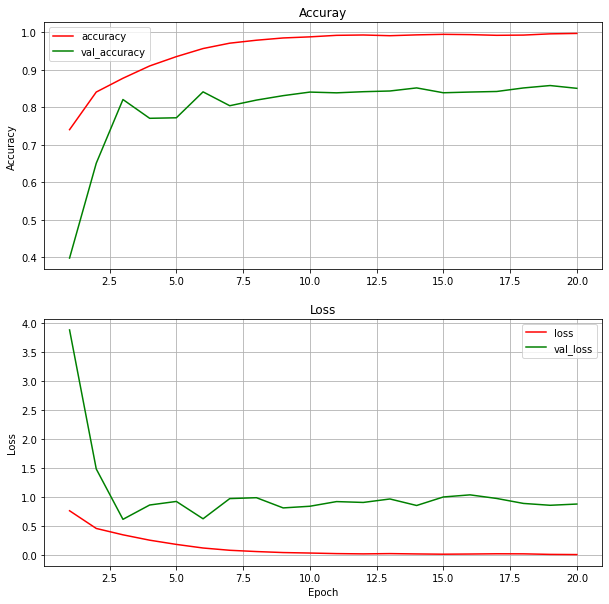

In [11]:
loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'r', label='accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'r', label='loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### 결과 출력을 위한 함수

In [12]:
def Make_Result_Plot(suptitle, data, label, y_max):
    fig_result, ax_result = plt.subplots(2, 5, figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx],cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 후 상황

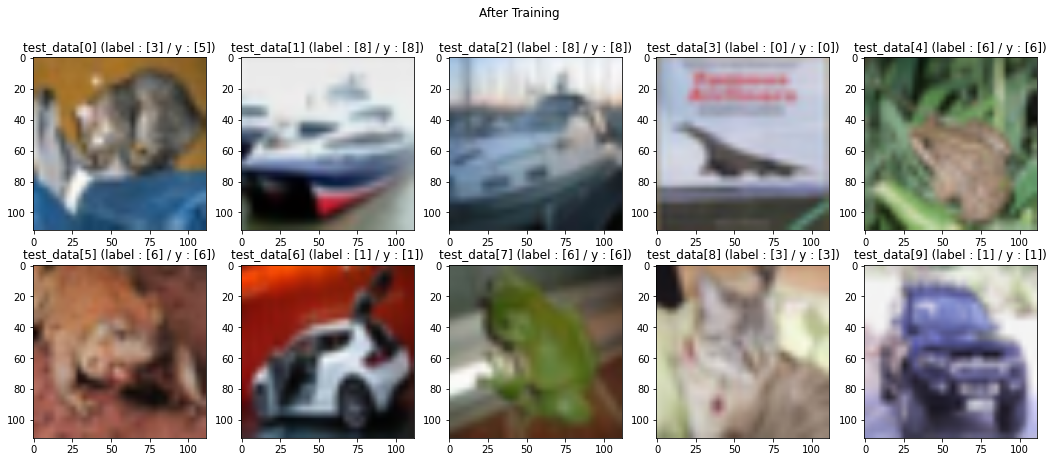

In [13]:
y_out = model_fine.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)